### More about overfitting
- the task: y = f(X), given n sample pairs of n * (y, X), we are looking the good 'f'. 
- if we use RF, how many estimators we need to have?

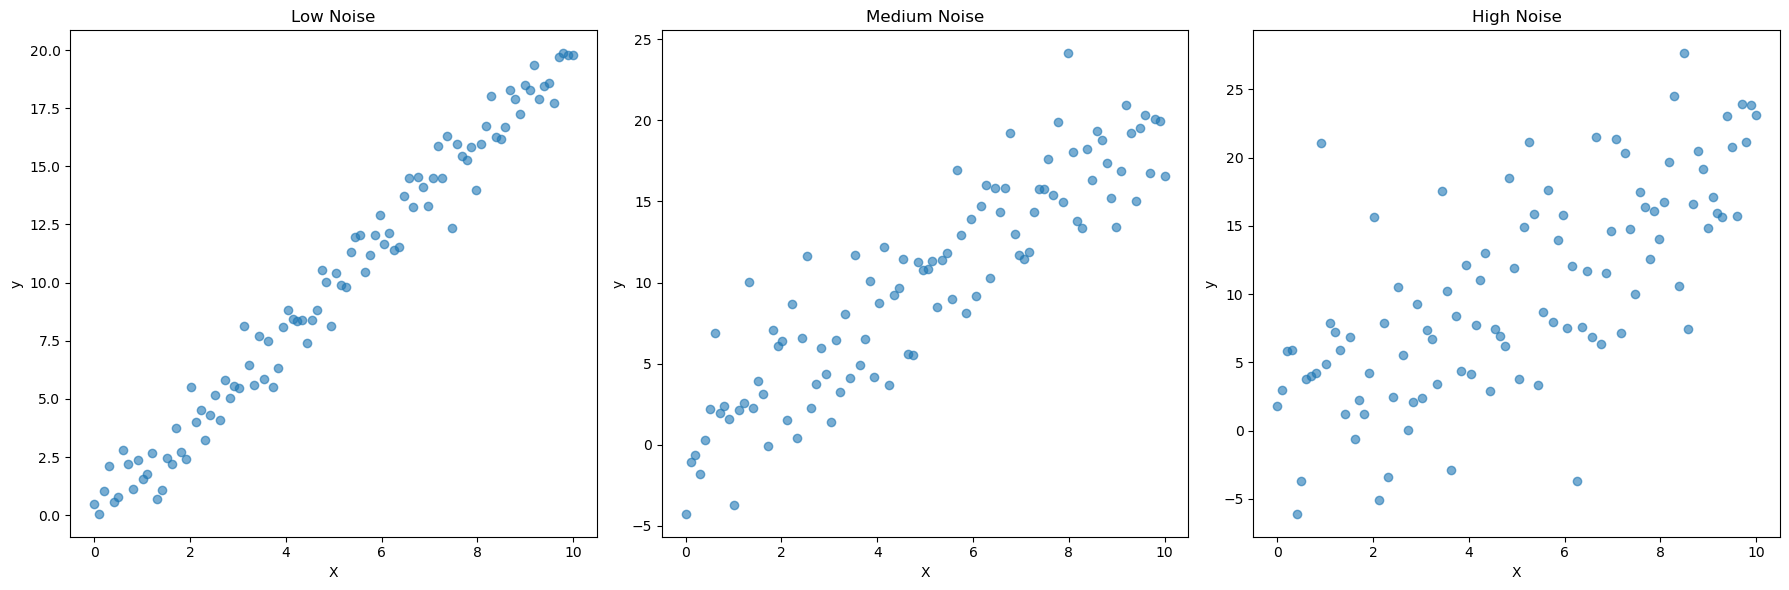

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate X values
X = np.linspace(0, 10, 100)

# Function to generate Y values with noise
def generate_y(X, noise_level):
    noise = np.random.normal(0, noise_level, X.shape)
    y = X * 2 + noise
    return y

# Generate Y values with different levels of noise
y_low_noise = generate_y(X, 1)   # Low noise
y_med_noise = generate_y(X, 3)   # Medium noise
y_high_noise = generate_y(X, 5)  # High noise

# Plotting
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X, y_low_noise, alpha=0.6)
plt.title('Low Noise')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.scatter(X, y_med_noise, alpha=0.6)
plt.title('Medium Noise')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(1, 3, 3)
plt.scatter(X, y_high_noise, alpha=0.6)
plt.title('High Noise')
plt.xlabel('X')
plt.ylabel('y')

plt.tight_layout()
plt.show()


### insights
- ML is an emprical process rather than hard science, inituition is highly important than rigorious reasoning
- samples (obs) should represent the underlying distribtuion. (samples indepently drawn)
- if samples  are really noisey. you would prefer less knobs in the models.
- you have to understand the domain of the datasets.
- try different things, iterate.

### Review Eval metrics
![confusion matrix](confusion-matrix.png)

### imblanced classes

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

(220, 2)

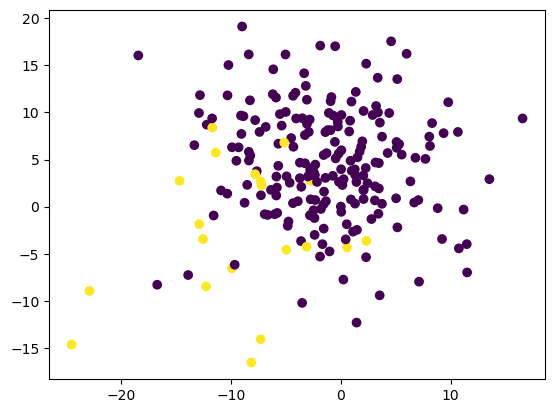

In [10]:
# Generate Test Data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=[200, 20], random_state=1, cluster_std=6)
plt.scatter(X[:, 0], X[:, 1], c=y)
display(X.shape)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
# Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
# Fit (train) or model using the training data
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[50,  0],
       [ 4,  1]])

In [14]:
from sklearn.metrics import classification_report
target_names = ["Class Purple", "Class Yellow"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

Class Purple       0.93      1.00      0.96        50
Class Yellow       1.00      0.20      0.33         5

    accuracy                           0.93        55
   macro avg       0.96      0.60      0.65        55
weighted avg       0.93      0.93      0.90        55



### Activity 2
- which classe is more important?
- what is better/worse, fp, fn?

### The Problem
- algo assumes or performs best the when the classes are balanced, otherwise bias towards majority, when minority is our interest
- solutions, oversampling minority/undersampling majority. synthetic data
- concern: Distortion of the original datasets.
- if the difference between purple and yellow is really big, than we can distort the distriubtion. 

### resampling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#### Generating the features and targets dataset


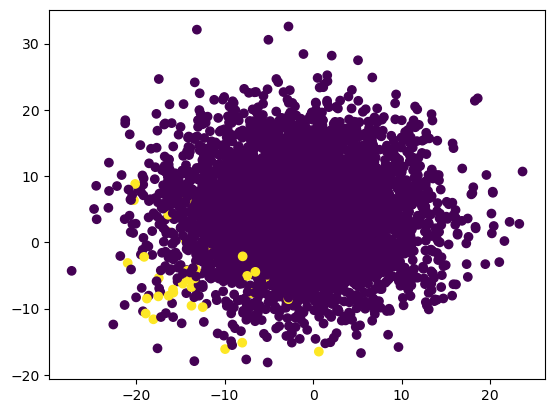

In [15]:
# Generate Data
X, y = make_blobs(n_samples=[5000, 50], random_state=1, cluster_std=7)
plt.scatter(X[:, 0], X[:, 1], c=y)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
# Count distinct values
unique, counts = np.unique(y_train, return_counts = True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 3753, 1: 34}


#### Random Undersampling
- you might need to update the imblearn lib using
- 'conda update scikit-learn imbalanced-learn'

#### Undersampling explained
- Basic Idea: Reduces the size of the majority class to match the minority class size.
- Pros: Simplifies the model and reduces training time.
- Cons: Significant loss of data, which could omit valuable information from the majority class.
- When to Use: When the dataset is large enough that reducing the majority class size won't discard too much information.

In [19]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rus = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [20]:
# Count distinct values
unique, counts = np.unique(y_resampled, return_counts = True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 34, 1: 34}


In [21]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model_resampled = RandomForestClassifier()
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [22]:
y_pred = model.predict(X_test)
y_pred_resampled = model_resampled.predict(X_test)

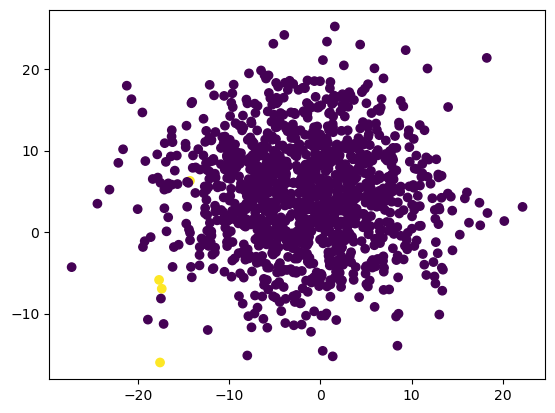

In [23]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_resampled)

In [25]:
# Print classification report
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.00      0.00      0.00        16

    accuracy                           0.98      1263
   macro avg       0.49      0.50      0.50      1263
weighted avg       0.97      0.98      0.98      1263

              precision    recall  f1-score   support

           0       1.00      0.81      0.89      1247
           1       0.05      0.75      0.09        16

    accuracy                           0.80      1263
   macro avg       0.52      0.78      0.49      1263
weighted avg       0.98      0.80      0.88      1263



#### Random Oversampling explained
- Basic Idea: make more copies of minority class to balance the class distribution.
- Pros: No loss of information from the majority class.
- Cons: Can lead to overfitting since it makes exact copies of the minority class instances.
- When to Use: When the dataset is small, and the loss of information (as in undersampling) is a significant concern.

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
rus = RandomOverSampler(random_state=1)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [31]:
# Count distinct values
unique, counts = np.unique(y_resampled, return_counts = True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 3753, 1: 3753}


In [32]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model_resampled = RandomForestClassifier()
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [33]:
y_pred = model.predict(X_test)
y_pred_resampled = model_resampled.predict(X_test)

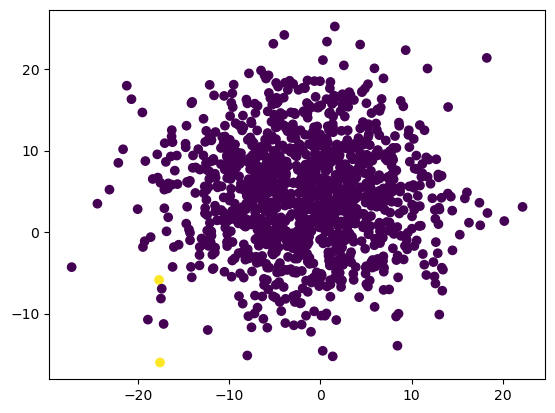

In [34]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

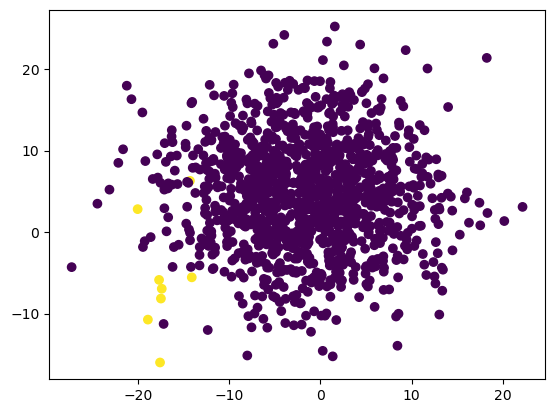

In [35]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_resampled)

In [36]:
# Print classification report
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1263
   macro avg       0.49      0.50      0.50      1263
weighted avg       0.97      0.99      0.98      1263

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.38      0.19      0.25        16

    accuracy                           0.99      1263
   macro avg       0.68      0.59      0.62      1263
weighted avg       0.98      0.99      0.98      1263



### Synthetic Resampling

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#### Generate an imbalanced data set

In [38]:
# Generate Data
X, y = make_blobs(n_samples=[5000, 50], random_state=1, cluster_std=7)
X = pd.DataFrame(X)
y = pd.Series(y)

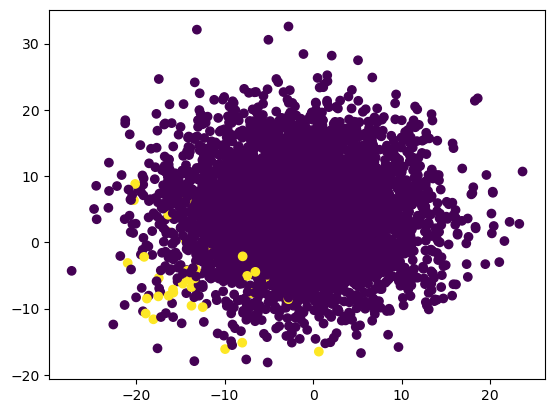

In [39]:
# Plot data
plt.scatter(
    x=X[0],
    y=X[1],
    c=y)
plt.show()

In [40]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [41]:
# Count distinct values
y_train.value_counts()

0    3753
1      34
Name: count, dtype: int64

#### Cluster Centroids explained
- generates synthetic samples that represent the centroids of these clusters for the majority class, effectively reducing its size. 
- Pros: preserve data structure (centroids)
- Cons: May lose some specific information by focusing on cluster centroids.

In [42]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

/Users/huanchensong/anaconda3/envs/pyviz/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [43]:
# Count resampled values
y_resampled.value_counts()

0    34
1    34
Name: count, dtype: int64

In [44]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model_resampled = RandomForestClassifier()
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [45]:
y_pred = model.predict(X_test)
y_pred_resampled = model_resampled.predict(X_test)

In [46]:
# Print classification reports
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.33      0.06      0.11        16

    accuracy                           0.99      1263
   macro avg       0.66      0.53      0.55      1263
weighted avg       0.98      0.99      0.98      1263

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1247
           1       0.06      0.75      0.11        16

    accuracy                           0.85      1263
   macro avg       0.53      0.80      0.52      1263
weighted avg       0.98      0.85      0.91      1263



#### SMOTE
- Generates synthetic examples of the minority class by interpolating between existing ones.
- Pros: Mitigates overfitting by creating diverse examples, not just replicas.
- Cons: Can introduce artificial noise, especially if minority class examples are close to majority class boundaries.
- When to Use: When the minority class is too small, and generating new, non-replicated data is necessary.

In [47]:
from imblearn.over_sampling import SMOTE
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')
X_resampled, y_resampled = smote_sampler.fit_resample(X_train, y_train)

In [48]:
y_resampled.value_counts()

0    3753
1    3753
Name: count, dtype: int64

In [49]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model_resampled = RandomForestClassifier()
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [50]:
y_pred = model.predict(X_test)
y_pred_resampled = model_resampled.predict(X_test)

In [51]:
# Print classification reports
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.50      0.06      0.11        16

    accuracy                           0.99      1263
   macro avg       0.74      0.53      0.55      1263
weighted avg       0.98      0.99      0.98      1263

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1247
           1       0.06      0.44      0.11        16

    accuracy                           0.91      1263
   macro avg       0.53      0.68      0.53      1263
weighted avg       0.98      0.91      0.94      1263



#### SMOTEENN
- Combines SMOTE and cleaning techniques (like ENN) to generate synthetic data and then clean it by removing any samples that are misclassified by their nearest neighbors.
- Pros: Reduces noise and outliers in the synthetic samples.
- Cons: Computationally intensive due to the cleaning process.
- When to Use: When both overfitting and noise in the minority class are concerns.

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

### Balanced Random Forest

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#### Prepare the data

In [ ]:
# Read dataset
df = pd.read_csv('Resources/credit_data.csv')
df.head()

In [ ]:
# Split target column from dataset
y = df['credit_risk']
X = df.drop(columns='credit_risk')

In [ ]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Count distinct values
y_train.value_counts()

In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
# Print classification report
print(classification_report(y_test, y_pred_rf))

#### BalancedRandomForestClassifier

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier()
brf.fit(X_train_scaled, y_train)

In [ ]:
# Predict labels for testing features
y_pred = brf.predict(X_test_scaled)

In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))